# Lista 03

Artificial neural networks for image classification.

In [39]:
READ_DATASETS = False

## Common Functions

In [38]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Plotting

In [2]:
def create_image_panel(images, labels, cols=3, title=None):

    if len(images) != len(labels):
        raise ValueError("Number of images and labels must be equal.")

    rows = int(len(images) / cols) + (len(images) % cols > 0)
    fig, axes = plt.subplots(rows, cols, figsize=(5, rows * 2))

    for i in range(rows*cols):
        row, col = divmod(i, cols)
        if rows == 1:
            axs = axes[col]
        else:
            axs = axes[row, col]
        if i < len(images):
            axs.imshow(images[i])
            axs.set_title(labels[i])
        axs.axis('off')

    if title is not None:
        fig.suptitle(title, fontsize=12)
    plt.tight_layout()
    return fig

In [118]:
colors = [
    "#22223B",
    "#4A4E69",
    "#0B3954",
    "#087E8B",
    "#C81D25",
    "#FF5A5F",
    "#11270b",
    "#3c5a14",
]

In [116]:
def create_bar_plot(labels, values, axis_label=None, title=None,
                    values2=None, axis2_label=None,
                    horizontal=False):

    if len(values) != len(labels):
        raise ValueError("Number of values and labels must be equal.")
    if horizontal and values2 is not None:
        raise ValueError("Cannot have twin axis in a horizontal bar plot.")

    fig, ax1 = plt.subplots(figsize=(5, 3))

    color = colors[0]
    color2 = colors[1]
    if values2 is None:
        width = 0.8
        delta = 0.
    else:
        width = 0.4
        delta = width/2.

    if horizontal:
        ax1.barh(
            labels,
            values,
            color=color,
        )
    else:
        ax1.bar(
            np.arange(len(labels)) - delta,
            values,
            color=color,
            width=width,
            align="center",
        )

    if values2 is not None:
        ax2 = ax1.twinx()
        ax2.bar(
            np.arange(len(labels)) + delta,
            values2,
            color=color2,
            width=width,
            align="center",
        )

    if not horizontal:
        ax1.set_xticks(np.arange(len(labels)))
        ax1.set_xticklabels(labels, rotation=0) #, fontdict={'fontsize':9})
    if axis_label is not None:
        if horizontal:
            ax1.set_xlabel(axis_label, color=color)
        else:
            ax1.set_ylabel(axis_label, color=color)
    if axis2_label is not None:
        ax2.set_ylabel(axis2_label, color=color2)

    if title is not None:
        plt.title(title)
    plt.tight_layout()
    return fig

### Confusion Matrix

In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [ ]:
def print_table(data, horizontal_lines=[1]):
    column_widths = [max(len(str(item)) for item in column)
                     for column in zip(*data)]
    format_string = " | ".join(f"{{:<{width}}}" for width in column_widths)
    for i, row in enumerate(data):
        if i in horizontal_lines:
            print("-" * len("| " + format_string.format(*row) + " |"))
        print("| " + format_string.format(*row) + " |")


def model_summary(model, X_test, y_test, labels, description, filename):

    def _model_summary_table(y_pred, y_test, labels):
        results = [("Class", "Recall", "F1 score")]
        balanced_accuracy = recall_score(y_test, y_pred, average="macro")
        f1_macro = f1_score(y_test, y_pred, average="macro")
        results.append(
            ("All", f"{balanced_accuracy:0.4f}", f"{f1_macro:0.4f}"))
        recall = recall_score(y_test, y_pred, average=None)
        f1 = f1_score(y_test, y_pred, average=None)
        for label, r, f1 in zip(labels, recall, f1):
            results.append((label, f"{r:0.4f}", f"{f1:0.4f}"))
        print_table(results, horizontal_lines=[1, 2])


    def _model_summary_confusion_matrix(y_test, y_pred, labels, description, filename):
        conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_disp = ConfusionMatrixDisplay(
            confusion_matrix=conf_matrix, display_labels=labels
        )
        _, ax = plt.subplots(figsize=(8, 6))
        plt.title(f"{description} Confusion Matrix")
        conf_matrix_disp.plot(ax=ax, xticks_rotation=0)
        conf_matrix_disp.im_.set_clim(0, 600)
        plt.savefig(f"report/png/{filename}", bbox_inches="tight")
        plt.show()

    y_pred = model.predict(X_test)
    _model_summary_table(y_pred, y_test, labels)
    _model_summary_confusion_matrix(
        y_pred, y_test, labels, description, filename)

## Database

 https://medmnist.com/

In [41]:
from medmnist import BloodMNIST

if READ_DATASETS:
    train_dataset = BloodMNIST(split="train", download=True)
    val_dataset = BloodMNIST(split="val", download=True)
    test_dataset = BloodMNIST(split="test", download=True)

    _ = joblib.dump(train_dataset, "train_dataset.sav")
    _ = joblib.dump(val_dataset, "val_dataset.sav")
    _ = joblib.dump(test_dataset, "test_dataset.sav")
else:
    train_dataset = joblib.load("train_dataset.sav")
    val_dataset = joblib.load("val_dataset.sav")
    test_dataset = joblib.load("test_dataset.sav")

In [42]:
train_dataset

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 11959
    Root location: C:\Users\tiago.LENOVO-I7\.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28

In [43]:
labels = [
    'basophil',
    'eosinophil',
    'erythroblast',
    'immature granulocytes',
    'lymphocyte',
    'monocyte',
    'neutrophil',
    'platelet'
]

In [134]:
X_train = train_dataset.imgs[:] / 255.
y_train = train_dataset.labels[:,0]

X_val = val_dataset.imgs[:] / 255.
y_val = val_dataset.labels[:,0]

X_test = test_dataset.imgs[:] / 255.
y_test = test_dataset.labels[:,0]

In [45]:
print(f"Train data: {X_train.shape}")
print(f"Validation data: {X_val.shape}")
print(f"Test data: {X_test.shape}")

Train data: (11959, 28, 28, 3)
Validation data: (1712, 28, 28, 3)
Test data: (3421, 28, 28, 3)


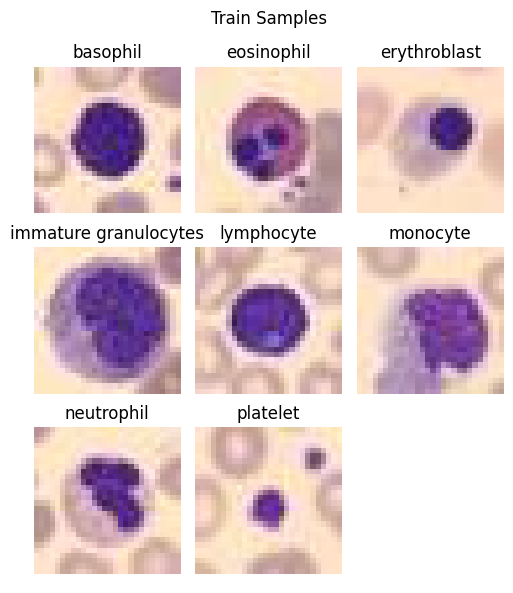

In [137]:
images = []
for i in range(len(labels)):
    images.append(X_train[y_train==i][0])

image_panel = create_image_panel(images, labels, title="Train Samples")
plt.show(image_panel)

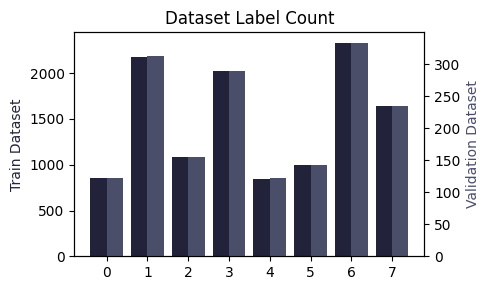

In [146]:
label_count_train = [sum(y_train==i) for i in range(len(labels))]
label_count_val = [sum(y_val==i) for i in range(len(labels))]
create_bar_plot(
    labels=range(len(labels)),
    values=label_count_train,
    axis_label="Train Dataset",
    values2=label_count_val,
    axis2_label="Validation Dataset",
    title="Dataset Label Count",
)
plt.show()

## MLP

In [155]:
from tensorflow import keras
import tensorflow as tf

In [141]:
mlp = keras.models.Sequential(
    [
        keras.layers.Input(shape=(28,28,3)),
        keras.layers.Flatten(),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(len(labels), activation="softmax")
    ]
)

In [142]:
mlp.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)

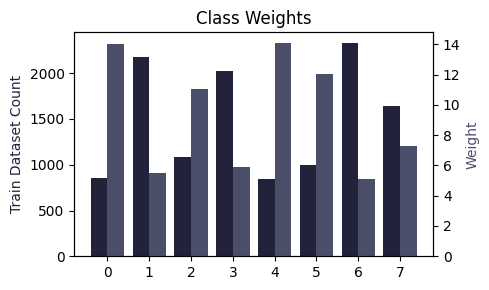

In [152]:
class_weight = {i:1 / sum(y_train==i) * len(y_train) for i in range(len(labels))}

create_bar_plot(
    labels=range(len(labels)),
    values=label_count_train,
    axis_label="Train Dataset Count",
    values2=class_weight.values(),
    axis2_label="Weight",
    title="Class Weights",
)
plt.show()

https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=pt-br

In [153]:
callbacks = [
    # keras.callbacks.ModelCheckpoint(filepath="mlp_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        start_from_epoch=10,
        mode='min',
        restore_best_weights=True),
]

mlp_history = mlp.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data = (X_val, y_val),
    class_weight=class_weight
)

Epoch 1/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - acc: 0.3749 - loss: 13.4031 - val_acc: 0.5532 - val_loss: 1.2210
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - acc: 0.6111 - loss: 8.8102 - val_acc: 0.6817 - val_loss: 0.9659
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.6576 - loss: 7.8297 - val_acc: 0.7371 - val_loss: 0.8370
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.6894 - loss: 7.3770 - val_acc: 0.7202 - val_loss: 0.8179
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.7069 - loss: 6.9025 - val_acc: 0.7050 - val_loss: 0.8540
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - acc: 0.7078 - loss: 6.7573 - val_acc: 0.7319 - val_loss: 0.7839
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - acc: 0.7273 - loss: 6.4251 - val_acc: 0.7348 - val_loss: 0.7595
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - acc: 0.7353 - loss: 6.2192 - val_acc: 0.7734 - val_loss: 0.6680
Epoch 9/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 14m

In [176]:
def plot_metrics(history):
  metrics = ['acc', 'loss']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,
             history.history[metric],
             color=colors[2],
             label='Train')
    plt.plot(history.epoch,
             history.history['val_'+metric],
             color=colors[3],
            #  linestyle="--",
             label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()
    plt.tight_layout()


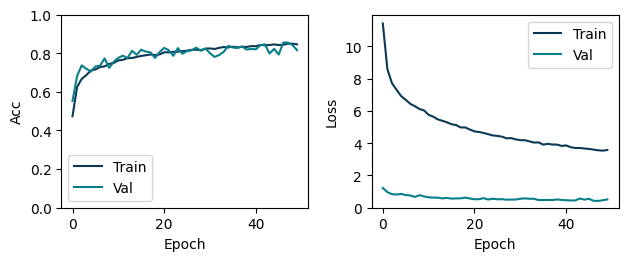

In [177]:
plot_metrics(mlp_history)

In [ ]:
model_summary(model, X_test, y_test, labels, description, filename)

In [ ]:
# from tensorflow import keras
# import tensorflow as tf

class BalancedAccuracy(keras.metrics.Metric):

  def __init__(self, name='balanced_accuracy', **kwargs):
    super(BalancedAccuracy, self).__init__(name=name, **kwargs)
    self.numerator = tf.keras.metrics.TruePositives()
    self.denominator = tf.keras.metrics.TruePositives() + tf.keras.metrics.FalseNegatives()
    self.count = tf.keras.metrics.TruePositives() + tf.keras.metrics.FalsePositives()
    self.mean = tf.keras.metrics.Mean()

  def update_state(self, y_true, y_pred):
    # Update true positives, false negatives, and total count
    self.numerator.update_state(y_true, y_pred)
    self.denominator.update_state(y_true, y_pred)
    self.count.update_state(y_true, y_pred)

  def result(self):
    # Calculate precision for each class and average them
    class_precision = self.numerator.result() / self.denominator.result()
    balanced_acc = self.mean(class_precision)
    return balanced_acc

  def reset_states(self):
    self.numerator.reset_states()
    self.denominator.reset_states()
    self.count.reset_states()


class MeanF1Score(keras.metrics.Metric):

  def __init__(self, name='mean_f1_score', **kwargs):
    super(MeanF1Score, self).__init__(name=name, **kwargs)
    self.numerator = tf.keras.metrics.TruePositives()
    self.denominator = tf.keras.metrics.TruePositives() + tf.keras.metrics.FalseNegatives()
    self.count = tf.keras.metrics.TruePositives() + tf.keras.metrics.FalsePositives()
    self.mean = tf.keras.metrics.Mean()

  def update_state(self, y_true, y_pred):
    # Update true positives, false negatives, and total count
    self.numerator.update_state(y_true, y_pred)
    self.denominator.update_state(y_true, y_pred)
    self.count.update_state(y_true, y_pred)

  def result(self):
    # Calculate precision for each class and average them
    class_precision = self.numerator.result() / self.denominator.result()
    class_recall = self.numerator.result() / self.count.result()
    f1_score = 2 * (class_precision * class_recall) / (class_precision + class_recall)
    mean_f1 = self.mean(f1_score)
    return mean_f1

  def reset_states(self):
    self.numerator.reset_states()
    self.denominator.reset_states()
    self.count.reset_states()
    self.mean.reset_states()

# Compile your model with the custom metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[MeanF1Score()])


## Simple CNN

## Deep CNN